In [41]:
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
from qiskit_aer.noise import NoiseModel
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

In [42]:
%set_env QXToken="enteryouribmtocken"

env: QXToken=5a94efdb1956b05c58391d53a5f59586f05c845bd7f294f31176e7ae4ca33974fef1869d994dc110bf4638deb3fba368b7c5986a2736782752492c1c3dd218ea


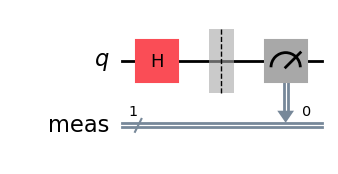

In [43]:
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()
qc.draw('mpl')

In [44]:
def random_bit_gen():

    qc = QuantumCircuit(1)
    qc.h(0)
    qc.measure_all()
        
    backend = AerSimulator(noise_model=NoiseModel.from_backend(FakeAlmadenV2()))
    pm = generate_preset_pass_manager(backend=backend,optimization_level=0)
    transpiled_qc = pm.run(qc)

    shots = 10000

    sampler = StatevectorSampler(default_shots=shots)
    pub = sampler.run([transpiled_qc])
    job_sampler = pub 
    result_sampler = job_sampler.result()
    counts = result_sampler[0].data.meas.get_counts()

    #print(counts)

    p0 = counts.get('0', 0) / shots  # Probability of 0
    p1 = counts.get('1', 0) / shots  # Probability of 1

    #print(p0,p1)

    x =  0 if p0 > p1 else 1 
    #print(x)
    return x

In [52]:
def generate_QRN(min_value=0, max_value=10000):
    range_rn = max_value - min_value + 1
    n_bits = range_rn.bit_length() 

    while True:
        random_bits = [random_bit_gen() for _ in range(n_bits)]
        random_number = int("".join(map(str, random_bits)), 2)
        
        if random_number < range_rn:
            return min_value + random_number

In [ ]:
def generate_QRN_float(min_value=0, max_value=10000, precision_bits=8):

    random_fraction_bits = [random_bit_gen() for _ in range(precision_bits)]
    
    #random binary fraction 
    random_fraction = sum(bit * (0.5 ** (i + 1)) for i, bit in enumerate(random_fraction_bits))
    
    random_float = min_value + (max_value - min_value) * random_fraction

    return random_float

In [53]:
x = generate_QRN(0,10000)
print(x)

3601


In [ ]:
x = generate_QRN_float(0,10000,8)

In [54]:

random_numbers = []
for _ in range(1000):  
    random_numbers.append(generate_QRN(0,10000))

# Plot a histogram of the generated random numbers
plt.hist(random_numbers, bins=20, range=(0, 10000), color='blue', edgecolor='black')
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.title('Histogram of Quantum Random Numbers')
plt.show()

KeyboardInterrupt: 

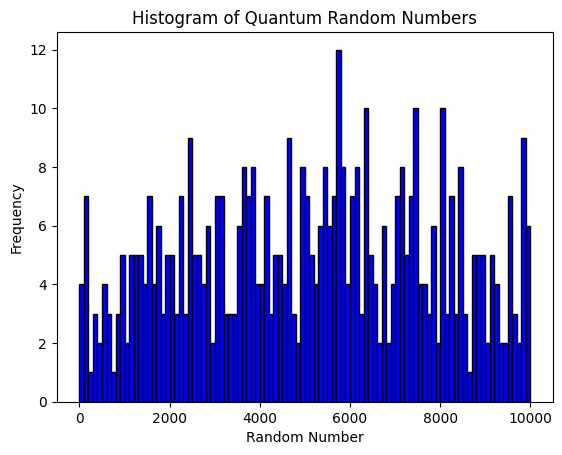

In [58]:
plt.hist(random_numbers[:500], bins=100, range=(0, 10000), color='blue', edgecolor='black')
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.title('Histogram of Quantum Random Numbers')
plt.show()

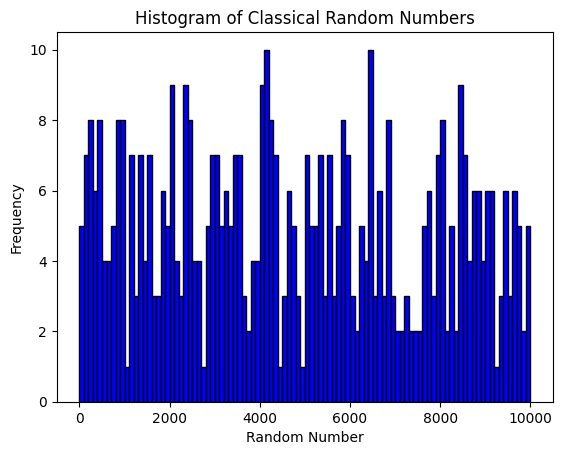

In [62]:
import numpy as np
random_numbers_classical = np.random.randint(0, 10001, 500)


plt.hist(random_numbers_classical, bins=100, range=(0, 10000), color='blue', edgecolor='black')
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.title('Histogram of Classical Random Numbers')
plt.show()